# Exploratory Data Analysis on Wind, Tide, and Nutrient Pulses

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from scipy.stats import pearsonr

In [2]:
# import data
infile = '../data/external/Wind_hourly_2020.csv'
data = pd.read_csv(infile, usecols=[0, 1, 2, 3], parse_dates=['DateTime'], infer_datetime_format=True, sep=',')
# select the dateTime range
data['DateTime'] = pd.to_datetime(data['DateTime'])
data = data[data.DateTime > pd.Timestamp('2020-05-31 23:59:00')]
data = data[data.DateTime < pd.Timestamp('2020-10-06 00:59:00')]
data

,DateTime,WindSpeed,WindDirection,WindGustSpeed
24,2020-06-01 00:59:00,0.0,0.0,NaN
25,2020-06-01 01:59:00,7.0,110.0,NaN
26,2020-06-01 02:59:00,0.0,0.0,NaN
27,2020-06-01 03:59:00,5.0,280.0,NaN
28,2020-06-01 04:59:00,8.0,340.0,NaN
...,...,...,...,...
3043,2020-10-05 19:59:00,0.0,0.0,NaN
3044,2020-10-05 20:59:00,0.0,0.0,NaN
3045,2020-10-05 21:59:00,0.0,0.0,NaN
3046,2020-10-05 22:59:00,0.0,0.0,NaN


In [3]:
# fill data gaps
data['WindSpeed'].fillna(method='ffill',inplace=True)
data['WindDirection'].fillna(method='ffill',inplace=True)
# create vector
cos_WindDir = np.deg2rad(data['WindDirection'])
sin_WindDir= np.deg2rad(data['WindDirection'])
U_wind=data['WindSpeed']*0.44704*np.cos(cos_WindDir)
V_wind=data['WindSpeed']*0.44704*np.sin(sin_WindDir)

In [4]:
# load in the csv file, you need to specify the directory of the data file
infile = '../data/processed/Cleaned_mooring_2020.csv'
# colnames = ['Temp_AC','Sal_AC','Fluor_AC','Chl_AC','Temp_NY','Sal_NY','Fluor_NY','Chl_NY','Temp_NY_btm','Sal_NY_btm','Fluor_NY_btm','Chl_NY_btm','DateTime_NY']
data_YSI = pd.read_csv(infile, usecols=['Date_Time_NY','Depth_meter_NY'],parse_dates=['Date_Time_NY'], infer_datetime_format=True, sep = ',')
data_YSI

,Date_Time_NY,Depth_meter_NY
0,2020-06-01 00:01:00,0.40
1,2020-06-01 00:16:00,0.44
2,2020-06-01 00:31:00,0.48
3,2020-06-01 00:46:00,0.52
4,2020-06-01 01:01:00,0.57
...,...,...
12187,2020-10-05 22:46:00,1.12
12188,2020-10-05 23:01:00,1.15
12189,2020-10-05 23:16:00,1.18
12190,2020-10-05 23:31:00,1.20


In [5]:
data_YSI['Depth_meter_NY'].fillna(method='bfill',inplace=True)

In [6]:
# Load nutrient data
infile = '../data/processed/Nutrient_2020_V4.csv'
nuts = pd.read_csv(infile, usecols=['Date_Time_NYCC', 'D2_N+N_NY', 'D3_N+N_NY','D2_NH4_NY', 'D3_NH4_NY'], parse_dates=['Date_Time_NYCC'], infer_datetime_format=True, sep=',')
# select the dateTime range
#nuts['Date_Time_NYCC'] = pd.to_datetime(data['Date_Time_NYCC'])
nuts = nuts[nuts.Date_Time_NYCC > pd.Timestamp('2020-05-31 23:59:00')]
nuts = nuts[nuts.Date_Time_NYCC < pd.Timestamp('2020-10-06 00:59:00')]
nuts

,Date_Time_NYCC,D2_N+N_NY,D3_N+N_NY,D2_NH4_NY,D3_NH4_NY
0,2020-06-01 13:20:00,4.18,2.50,5.86,6.05
1,2020-06-03 13:10:00,0.52,0.38,5.27,5.54
2,2020-06-05 13:30:00,1.06,1.08,5.05,4.77
3,2020-06-08 13:26:00,0.87,1.41,4.74,5.32
4,2020-06-10 14:18:00,0.88,1.04,5.92,5.44
5,2020-06-12 13:28:00,NaN,NaN,5.49,4.57
6,2020-06-15 13:20:00,2.30,2.28,2.90,4.99
7,2020-06-17 13:20:00,NaN,2.91,11.44,11.59
8,2020-06-19 13:15:00,3.19,3.58,13.42,14.34
9,2020-06-22 13:05:00,NaN,3.55,NaN,NaN


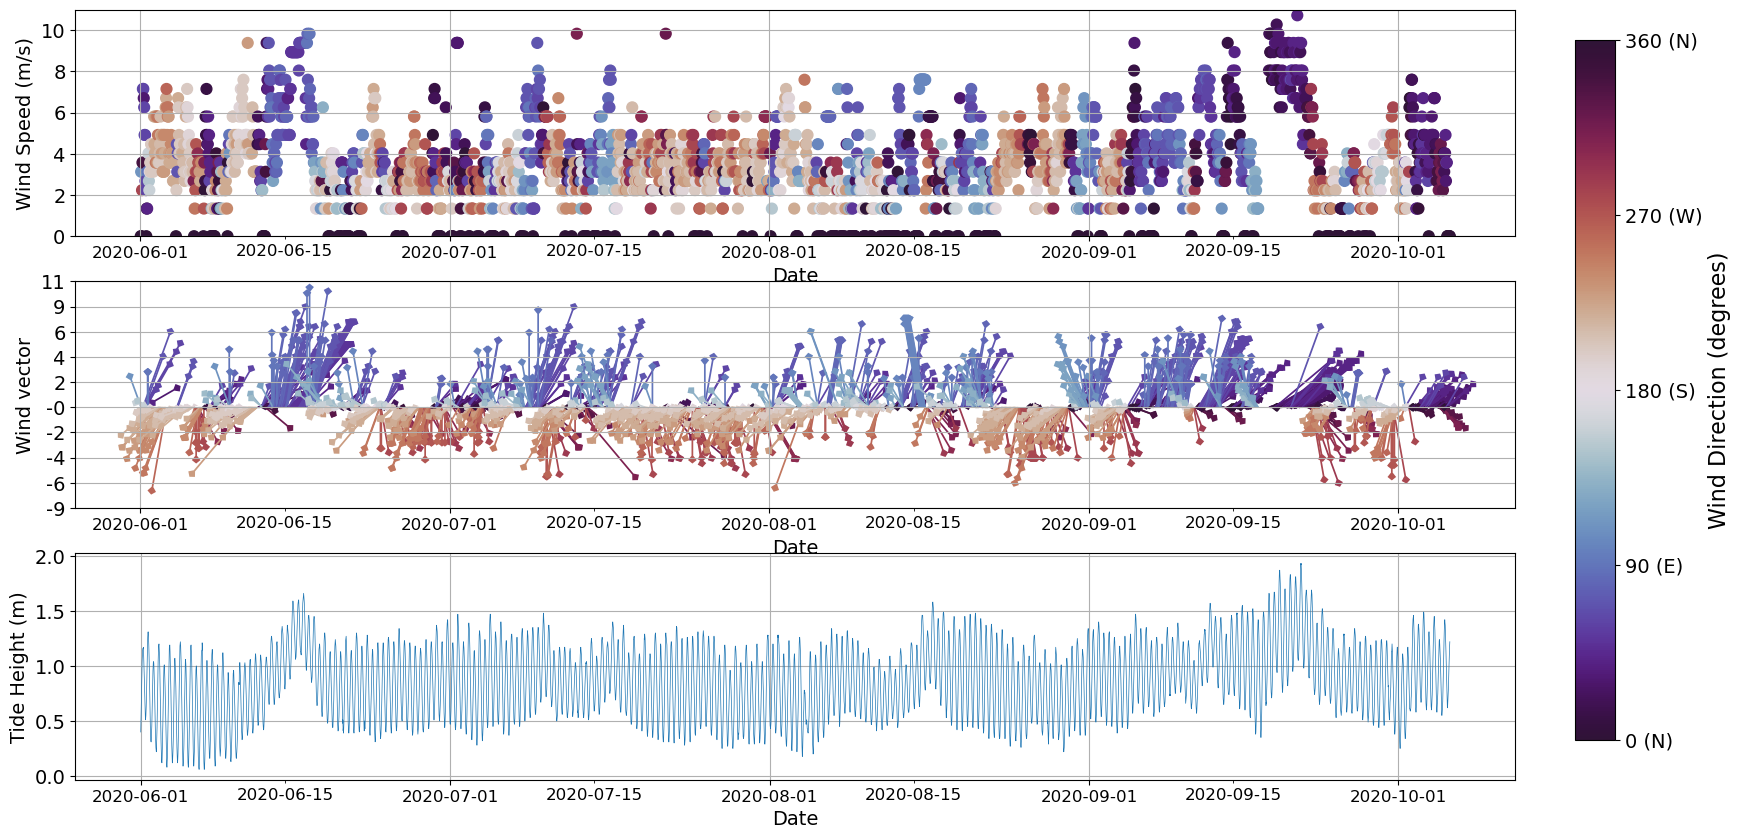

In [7]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
# Define a colormap based on wind direction
cmap = plt.cm.get_cmap('twilight_shifted', 360)
norm = plt.Normalize(vmin=0, vmax=360)
# Plot the wind direction data in the bottom subplot, using color to indicate direction
scatter=axes[0].scatter(data['DateTime'], data['WindSpeed']*0.44704, c=data['WindDirection'],  s=60, cmap=cmap, norm=norm)
# create a separate axis object for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
# add the colorbar to the figure
cbar = plt.colorbar(scatter, cbar_ax)
# show only the first 4 ticks on the colorbar
cbar.set_ticks([0, 90, 180, 270,360])
cbar.set_ticklabels(['0 (N)', '90 (E)', '180 (S)', '270 (W)','360 (N)'])
cbar.set_label('Wind Direction (degrees)',fontsize=16)
cbar.ax.tick_params(labelsize=14)
# adjust the subplot and colorbar positions as needed
fig.subplots_adjust(left=0.15, right=0.87, wspace=0.3)
axes[0].set_ylabel('Wind Speed (m/s)',fontsize=14)
axes[0].set_xlabel('Date',fontsize=14)
axes[0].set_ylim(0,11)
WindSpeed = data['WindSpeed']*0.44704
y_ticks =np.arange(0,np.max(WindSpeed),2)
y_tick_labels = ['{:.0f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 14)

date_fmt = mdates.DateFormatter('%Y-%m-%d')
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
month_locator = mdates.MonthLocator()
day_locator = mdates.DayLocator(bymonthday=[1, 15])

axes[0].xaxis.set_major_locator(month_locator)
axes[0].xaxis.set_minor_locator(day_locator)
#axes[0].set_xlim(min(Date_Time),max(Date_Time))
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[0].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=12)
axes[0].grid(True)

# subplot 2
y = np.zeros(len(data['DateTime']))
# Convert wind directions to colors
norm = mcolors.Normalize(vmin=0, vmax=360)
colors = plt.cm.twilight_shifted(norm(data['WindDirection']))
axes[1].quiver(data['DateTime'], y, U_wind, V_wind, color= colors, scale=10, scale_units='xy', width=0.0012, headwidth=5, headlength=2)
# Set y-axis tick labels to correspond to true wind speed
y_ticks = np.arange(-(np.ceil(np.max(y))+0.8), np.ceil(np.max(y))+1.1, 0.2)
y_tick_labels = ['{:.0f}'.format(WindSpeed.max() * t) for t in y_ticks]
axes[1].set_yticks(y_ticks,fontsize=14)
axes[1].set_yticklabels(y_tick_labels,fontsize=14)
axes[1].set_ylabel('Wind vector',fontsize=14)
axes[1].set_xlabel('Date',fontsize=14)

axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[1].xaxis.set_major_locator(month_locator)
axes[1].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[1].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=12)
axes[1].grid(True)

# subplot 3
# axes[2].scatter(data_YSI['Date_Time_NY'], data_YSI['Depth_meter_NY'], s=5)
axes[2].plot(data_YSI['Date_Time_NY'], data_YSI['Depth_meter_NY'], marker ='o', markersize = 0, linestyle='-', linewidth=0.5)
axes[2].set_xlabel('Date',fontsize=14)
axes[2].set_ylabel('Tide Height (m)',fontsize=14)
# Set y-axis tick labels to correspond to tide
y_ticks = np.arange(0, np.ceil(np.max(data_YSI['Depth_meter_NY']))+0.5, 0.5)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[2].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes[2].xaxis.set_major_formatter(date_fmt)
axes[2].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[2].xaxis.set_major_locator(month_locator)
axes[2].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[2].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=12)
axes[2].grid(True)

# show plot
plt.show()

In [8]:
data_YSI= data_YSI.set_index('Date_Time_NY')
data = data.set_index('DateTime')

In [9]:
# down sample tide height data to hourly frequency
tide_dwsampled = data_YSI['Depth_meter_NY'].resample('H').fillna(method='bfill')
WS_resampled = data['WindSpeed'].resample('H').fillna(method='bfill')
WS_resampled = WS_resampled*0.44704

WD_resampled = data['WindDirection'].resample('H').fillna(method='bfill')

# stack DataFrames side by side
data_combined = pd.concat([WS_resampled,WD_resampled, tide_dwsampled], axis=1,join='outer')
data_combined = data_combined.rename_axis('Datetime')
# Save the combined data to a new CSV file
data_combined.to_csv(r'../data/processed/combined_tide_wind_data.csv')

In [10]:
# Calculate the Pearson correlation coefficient between wind speed, wind direction, and tide height
corr, p_value = pearsonr(WS_resampled,tide_dwsampled)
print('Pearson correlation coefficient between wind speed and tide height:', corr)

corr, p_value = pearsonr(WD_resampled,tide_dwsampled)
print('Pearson correlation coefficient between wind direction and tide height:', corr)


Pearson correlation coefficient between wind speed and tide height: 0.2178546581579182
Pearson correlation coefficient between wind direction and tide height: -0.1661233769839892


#### Define (1) significant wind speed, (2) significant tide height

In [11]:
# Calculate the 60th percentile for tide
signifit_tide = tide_dwsampled- np.percentile(tide_dwsampled, 60)
signifit_tide[signifit_tide<0] = np.nan

# Calculate the 60th percentile for wind speed
signifit_WS = WS_resampled- np.percentile(WS_resampled, 60)
signifit_WS[signifit_WS<0] = np.nan


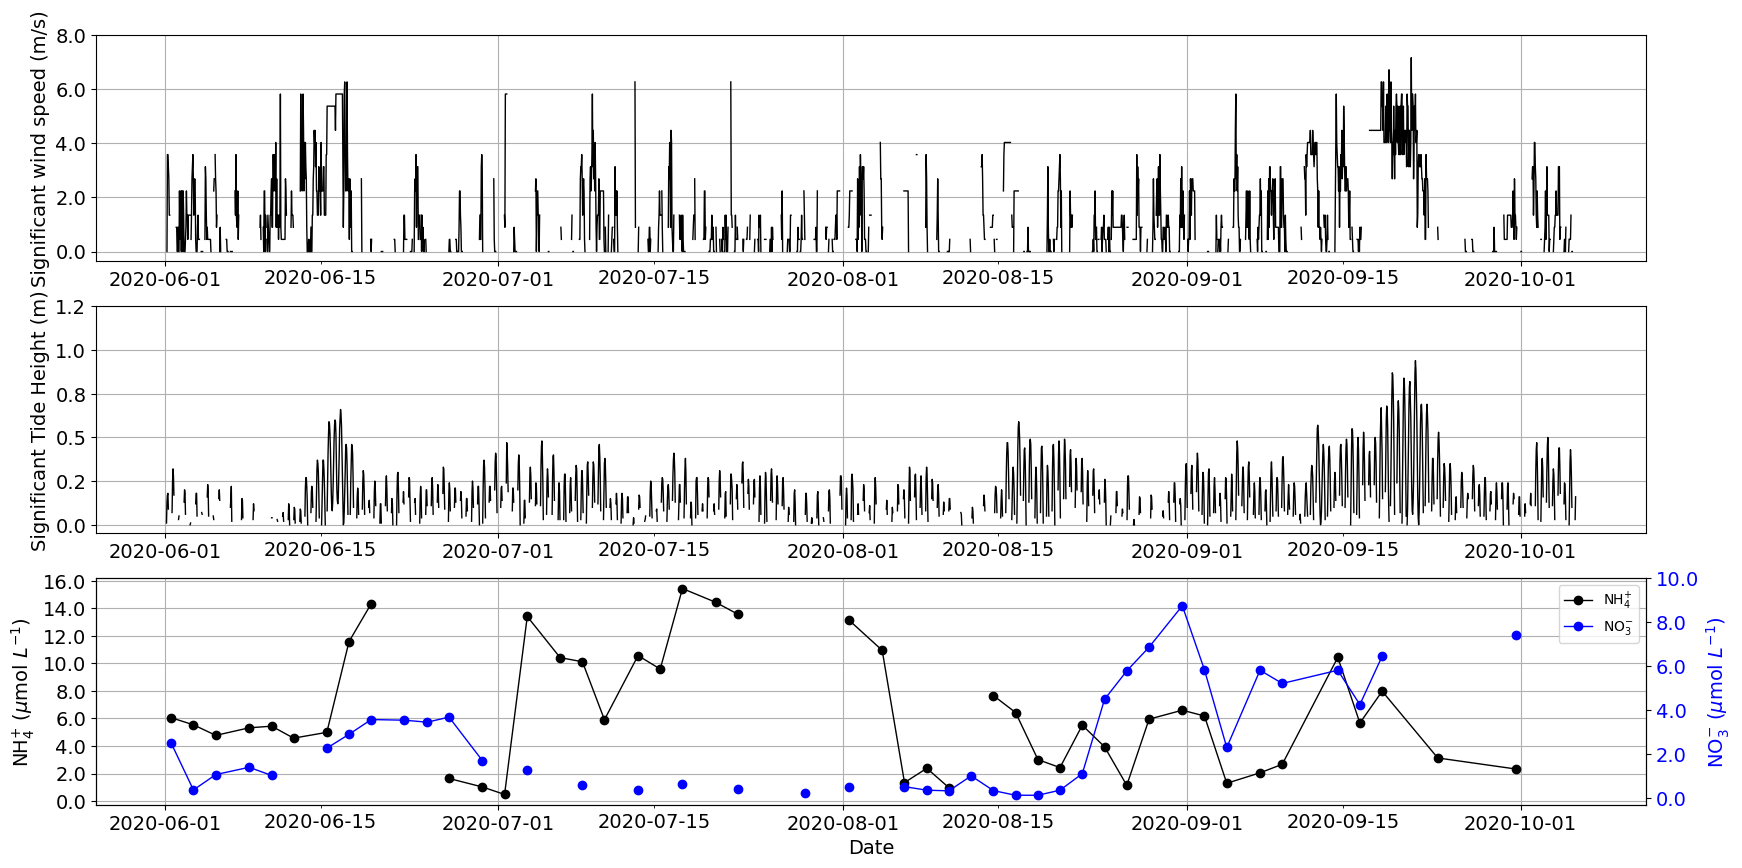

In [12]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(3, 1, figsize=(20, 10),sharex=True)

axes[0].plot(signifit_WS.index, signifit_WS.array, marker ='o', markersize = 0, linestyle='-', linewidth=1, color='black')
axes[0].set_ylabel('Significant wind speed (m/s)',fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(signifit_WS))+0.5, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )

axes[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[0].xaxis.set_major_locator(month_locator)
axes[0].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[0].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=14)
axes[0].grid(True)

# subplot 2
axes[1].plot(signifit_tide.index, signifit_tide.array, marker ='o', markersize = 0, linestyle='-', linewidth=1, color='black')
axes[1].set_ylabel('Significant Tide Height (m)',fontsize=14)
# Set y-axis tick labels to correspond to tide
y_ticks = np.arange(0, np.ceil(np.max(signifit_tide))+0.5, 0.25)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[1].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[1].xaxis.set_major_locator(month_locator)
axes[1].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[1].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=14)
axes[1].grid(True)

# subplot 3
axes2 = axes[2].twinx()
l1= axes[2].plot(nuts['Date_Time_NYCC'], nuts['D3_NH4_NY'], marker ='o', markersize = 6, linestyle='-', linewidth=1, color='black',label ='NH$_4^{+}$')
#axes[2].plot(nuts['Date_Time_NYCC'], nuts['D2_NH4_NY'], marker ='o', markersize = 6, linestyle='-', linewidth=1, color='black')
axes[2].set_xlabel('Date',fontsize=14)
axes[2].set_ylabel('NH$_4^{+}$ ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(nuts['D3_NH4_NY']))+0.5, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[2].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )

#l2= axes2.plot(nuts['Date_Time_NYCC'], NO3_pulse, marker ='o', markersize = 6, linestyle='-', linewidth=1, color='blue', label='NO$_3^{-}$')
l2= axes2.plot(nuts['Date_Time_NYCC'], nuts['D3_N+N_NY'], marker ='o', markersize = 6, linestyle='-', linewidth=1, color='blue', label='NO$_3^{-}$')
#axes2.plot(nuts['Date_Time_NYCC'], nuts['D2_N+N_NY'], marker ='o', markersize = 6, linestyle='-', linewidth=1, color='blue')
axes2.set_xlabel('Date',fontsize=14)
axes2.set_ylabel('NO$_3^{-}$ ($\mu$mol $L^{-1}$)', color='blue', fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(nuts['D3_N+N_NY']))+2, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes2.set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes2.tick_params(axis='y', labelcolor='blue')
axes[2].xaxis.set_major_formatter(date_fmt)
axes[2].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[2].xaxis.set_major_locator(month_locator)
axes[2].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[2].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=14)
# combine the legends for both y-axes
lines, labels = axes[2].get_legend_handles_labels()
lines2, labels2 = axes2.get_legend_handles_labels()
axes[2].legend(lines + lines2, labels + labels2, loc='upper right')

axes[2].grid(True)

# show plot
plt.show()

* NH4 is more reactive in summer months than NO3, nutrient pulses are primarily in form of NH4 , however, in late Aug and early Sep, nitrification happens where NH4 is converted to NO3.

#### Define nutrient pulses

(1) Method 1—calculate climatological mean and deviation for 20 years historical data at LFA01 from the Chesapeake Bay Monitoring program. Using any data that is higher than mean+3*deviation as nuts pulses. This method doesn't work, as the standard deviation was very high ([see this notebook for details](https://github.com/Zhu-Yifan/Lafayette_River_Time_Series_Analysis/blob/master/notebooks/Chesapeake_Bay_Program_Water_Quality_EDA.ipynb) )

(2) Method 2—arbitrarily define nutrient pulses using a threshold such as 2 uM (see below).

In [13]:
# define nutrient pulses using method 2: [N]>2 umol/L
NH4_pulse = nuts['D3_NH4_NY']-2
NO3_pulse = nuts['D3_N+N_NY']-2
# calculate DIN by adding NH4 and NO3
# add columns while avoiding NaNs
DIN = nuts['D3_NH4_NY'].fillna(0) + nuts['D3_N+N_NY'].fillna(0)
# mask values that either NH4 or N+N has NaNs
idx = np.where(nuts['D3_NH4_NY'].isnull() | nuts['D3_N+N_NY'].isnull())  # find NaNs
DIN.array[idx]=np.nan

In [14]:
# signifit_tide = tide_dwsampled- 1
signifit_tide = tide_dwsampled- np.percentile(tide_dwsampled, 70)
signifit_tide[signifit_tide<0] = np.nan

# for wind speed > 4 m/s
#signifit_WS = WS_resampled- 4
signifit_WS = WS_resampled- np.percentile(WS_resampled, 70)
signifit_WS[signifit_WS<0] = np.nan

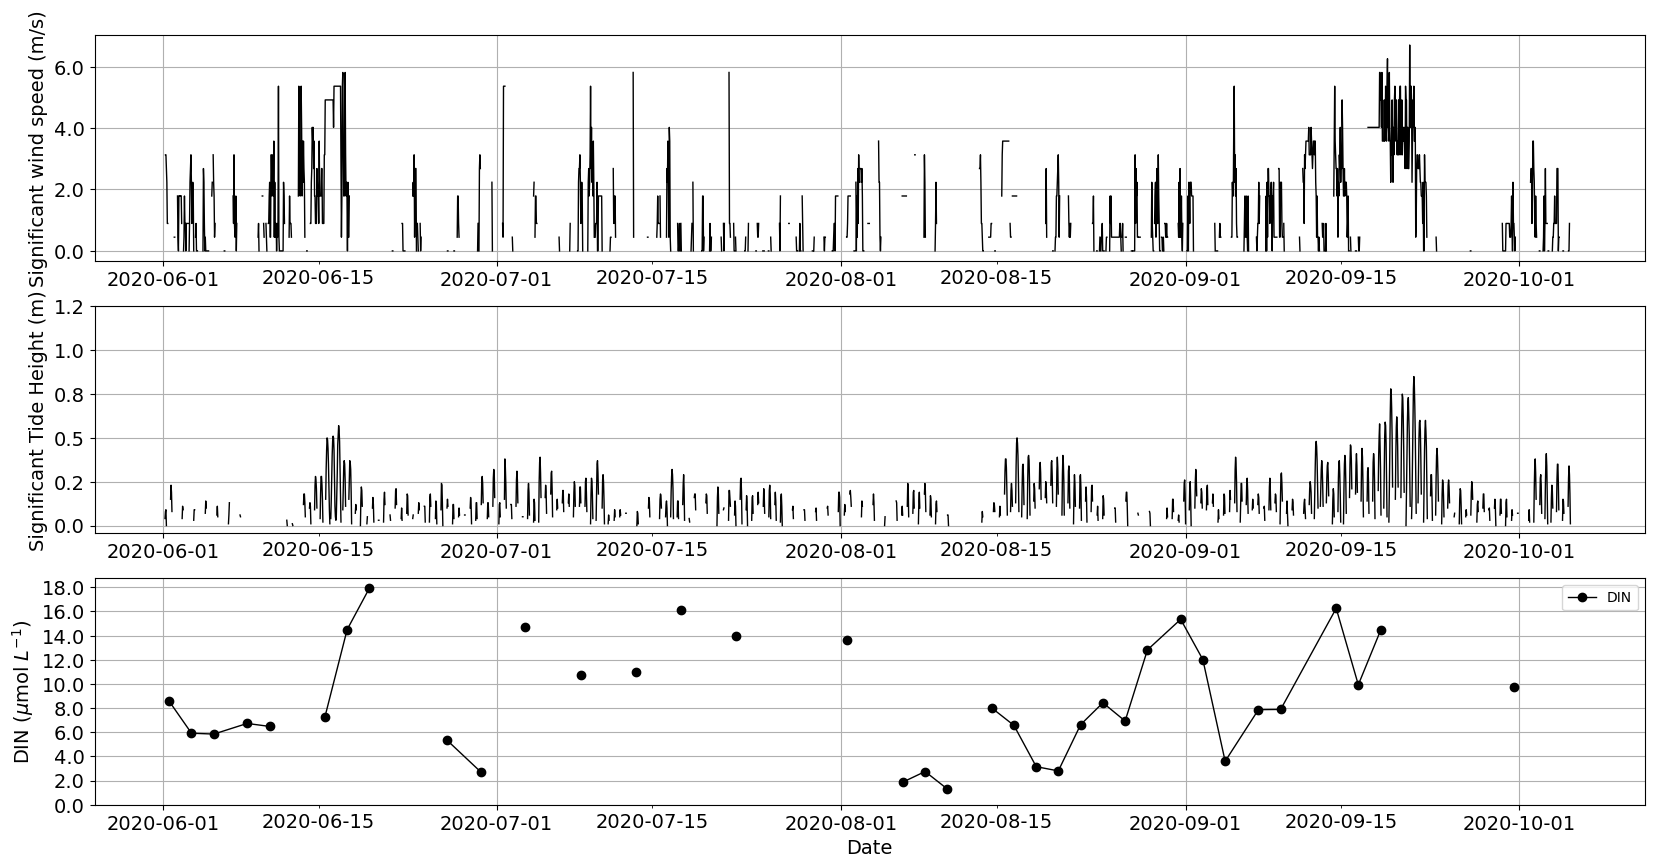

In [15]:
# plot time series data for each variable in a subplot
fig, axes = plt.subplots(3, 1, figsize=(20, 10),sharex=True)

axes[0].plot(signifit_WS.index, signifit_WS.array, marker ='o', markersize = 0, linestyle='-', linewidth=1, color='black')
axes[0].set_ylabel('Significant wind speed (m/s)',fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(signifit_WS))+0.5, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[0].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )

axes[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axes[0].xaxis.set_major_formatter(date_fmt)
axes[0].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[0].xaxis.set_major_locator(month_locator)
axes[0].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[0].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=14)
axes[0].grid(True)

# subplot 2
axes[1].plot(signifit_tide.index, signifit_tide.array, marker ='o', markersize = 0, linestyle='-', linewidth=1, color='black')
axes[1].set_ylabel('Significant Tide Height (m)',fontsize=14)
# Set y-axis tick labels to correspond to tide
y_ticks = np.arange(0, np.ceil(np.max(signifit_tide))+0.5, 0.25)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[1].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )
axes[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
axes[1].xaxis.set_major_formatter(date_fmt)
axes[1].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[1].xaxis.set_major_locator(month_locator)
axes[1].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[1].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=14)
axes[1].grid(True)

# subplot 3

axes[2].plot(nuts['Date_Time_NYCC'], DIN.array, marker ='o', markersize = 6, linestyle='-', linewidth=1, color='black',label ='DIN')
axes[2].set_xlabel('Date',fontsize=14)
axes[2].set_ylabel('DIN ($\mu$mol $L^{-1}$)',fontsize=14)
y_ticks = np.arange(0, np.ceil(np.max(DIN.array))+0.5, 2)
y_tick_labels = ['{:.1f}'.format(t) for t in y_ticks]
axes[2].set_yticks(y_ticks, y_tick_labels, fontsize = 14 )


axes[2].xaxis.set_major_formatter(date_fmt)
axes[2].xaxis.set_minor_formatter(date_fmt)
# Set the x-axis tick locator to show ticks on the 1st day and 15th day of each month
axes[2].xaxis.set_major_locator(month_locator)
axes[2].xaxis.set_minor_locator(day_locator)
# Set the tick parameters for both the major and minor ticks
plt.setp(axes[2].get_xticklabels(which='both'), rotation=0, ha='center', fontsize=14)

axes[2].legend()

axes[2].grid(True)

# show plot
plt.show()